In [22]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, Dropout, Input
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

### [1] 데이터 불러오기

In [23]:
input_length_h, input_length_w = 64, 64

In [24]:
data_generator = ImageDataGenerator(rescale = 1./255)

train_generator = data_generator.flow_from_directory(
    './data/',
    target_size = (input_length_h, input_length_w),
    batch_size = 551,
    class_mode='categorical'
)

Found 551 images belonging to 6 classes.


In [25]:
X_data, y_data = train_generator.next()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size = 0.1, stratify = y_data
)

#### [2] 모델 조절

In [27]:
list_test = []
list_test_accuracy = []
list_test_val_accuracy = []

In [28]:
def dridsearch(num) :
    print(f'dropout : {num} start -------------------------------------------')


    model = Sequential()

    # 1층
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name = 'conv2'))
    model.add(MaxPool2D((2, 2), name = 'pool1'))

    # 출력층
    model.add(Flatten())
    model.add(Dense(4096, activation="relu", name = 'dense1'))
    model.add(Dropout(num))
    model.add(Dense(2048, activation="relu", name = 'dense2'))
    model.add(Dropout(num))
    model.add(Dense(6, activation="softmax", name = 'output'))

    # compile
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

    history = model.fit(
        X_train, y_train,
        epochs=15,
        validation_data=(X_test, y_test),
        )

    list_test.append(num)
    list_test_accuracy.append(history.history['accuracy'])
    list_test_val_accuracy.append(history.history['val_accuracy'])
    print(f'dropout : {num} end -------------------------------------------')

In [29]:
list_drop = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [30]:
for i in range(0, len(list_drop)) :
    numb = list_drop[i]
    dridsearch(numb)

dropout : 0.0 start -------------------------------------------
Epoch 1/15
16/16 [==============================] - 23s 1s/step - loss: 11.8661 - accuracy: 0.1960 - val_loss: 1.7907 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 21s 1s/step - loss: 1.7903 - accuracy: 0.1919 - val_loss: 1.7879 - val_accuracy: 0.1964
Epoch 3/15
16/16 [==============================] - 23s 1s/step - loss: 1.7873 - accuracy: 0.1919 - val_loss: 1.7791 - val_accuracy: 0.1786
Epoch 4/15
16/16 [==============================] - 25s 2s/step - loss: 1.6920 - accuracy: 0.2788 - val_loss: 1.7463 - val_accuracy: 0.3036
Epoch 5/15
16/16 [==============================] - 24s 2s/step - loss: 1.3921 - accuracy: 0.4788 - val_loss: 1.8125 - val_accuracy: 0.3393
Epoch 6/15
16/16 [==============================] - 24s 2s/step - loss: 0.9743 - accuracy: 0.6404 - val_loss: 2.2428 - val_accuracy: 0.2679
Epoch 7/15
16/16 [==============================] - 24s 2s/step - loss: 0.6222 - accuracy: 0.78

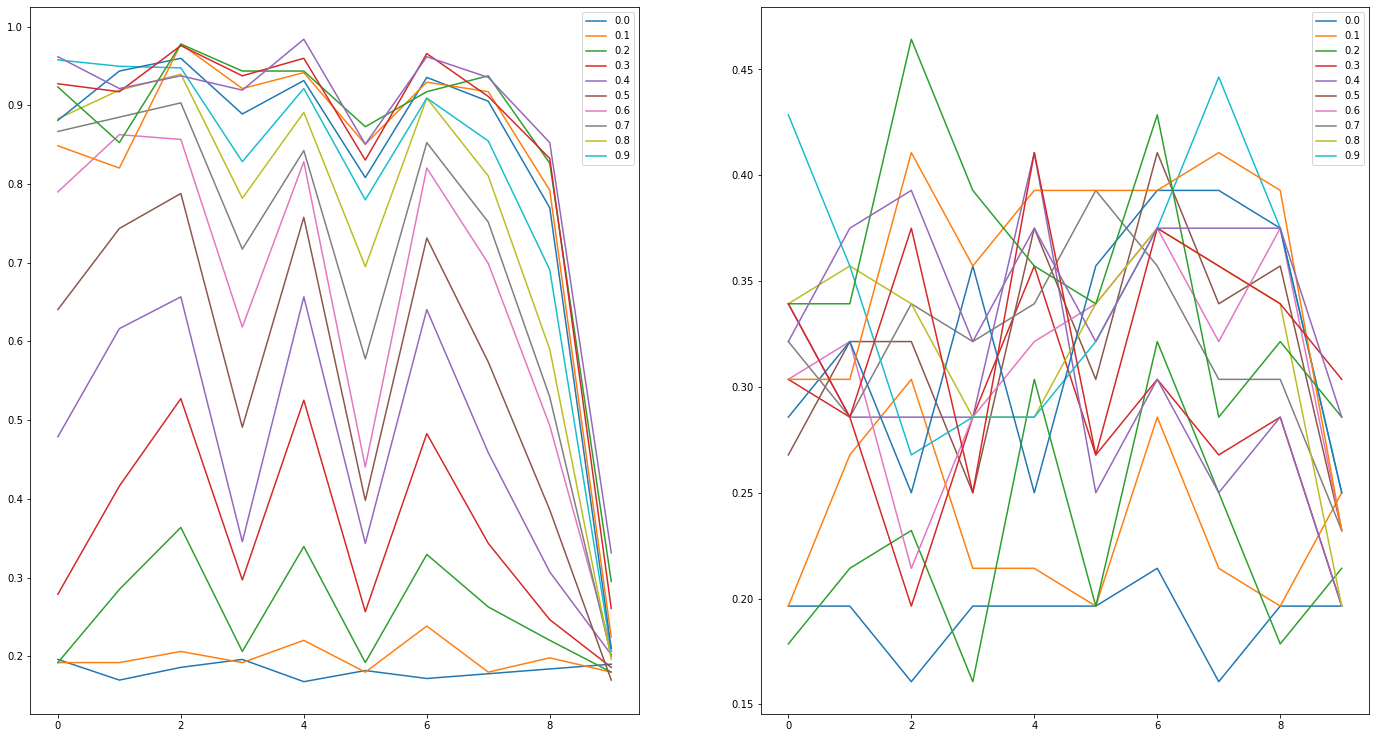

In [31]:
plt.figure(figsize=(24,13))

plt.subplot(1,2,1)
plt.plot(list_test_accuracy)
plt.legend(list_test)

plt.subplot(1,2,2)
plt.plot(list_test_val_accuracy)
plt.legend(list_test)
plt.show()

In [34]:
len(list_test_accuracy)

10

In [35]:
import numpy as np

list_val_acc = []

for i in range(0 ,10) :
    num = np.mean(list_test_val_accuracy[i])
    list_val_acc.append(num)

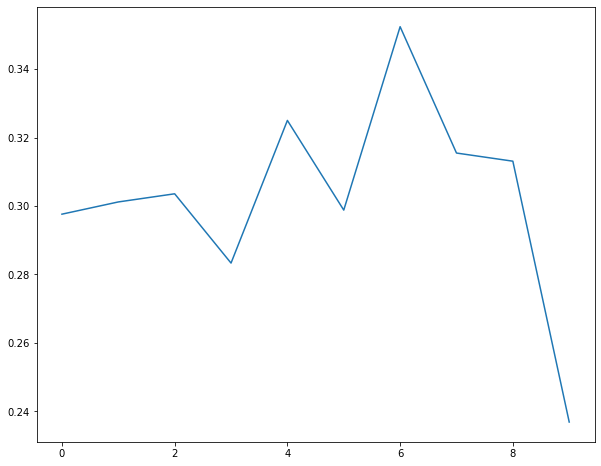

In [93]:
plt.figure(figsize=(10,8))
plt.plot(list_val_acc)
plt.show()

모델 drop = 0.6

---

In [37]:
model = Sequential()

# 1층
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name = 'conv2'))
model.add(MaxPool2D((2, 2), name = 'pool1'))

# 출력층
model.add(Flatten())
model.add(Dense(4096, activation="relu", name = 'dense1'))
model.add(Dropout(0.6))
model.add(Dense(2048, activation="relu", name = 'dense2'))
model.add(Dropout(0.6))
model.add(Dense(6, activation="softmax", name = 'output'))

# compile
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [38]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 27s 1s/step - loss: 6.1094 - accuracy: 0.1576 - val_loss: 1.7883 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 24s 1s/step - loss: 1.7797 - accuracy: 0.2343 - val_loss: 1.7719 - val_accuracy: 0.2321
Epoch 3/15
16/16 [==============================] - 26s 2s/step - loss: 1.6835 - accuracy: 0.2970 - val_loss: 1.7294 - val_accuracy: 0.2857
Epoch 4/15
16/16 [==============================] - 26s 2s/step - loss: 1.4372 - accuracy: 0.4566 - val_loss: 1.7626 - val_accuracy: 0.2500
Epoch 5/15
16/16 [==============================] - 26s 2s/step - loss: 1.1674 - accuracy: 0.5455 - val_loss: 1.8167 - val_accuracy: 0.1964
Epoch 6/15
16/16 [==============================] - 26s 2s/step - loss: 0.8516 - accuracy: 0.6747 - val_loss: 2.1210 - val_accuracy: 0.2679
Epoch 7/15
16/16 [==============================] - 25s 2s/step - loss: 0.6310 - accuracy: 0.8040 - val_loss: 2.3399 - val_accuracy: 0.3036
Epoch 8/15
16/16 [==

In [56]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

2/2 [==============================] - 0s 153ms/step


array([3, 2, 2, 2, 1, 5, 1, 0, 0, 0, 4, 0, 2, 3, 3, 2, 1, 0, 4, 2, 0, 1,
       4, 0, 0, 2, 0, 1, 3, 3, 5, 5, 1, 2, 0, 5, 4, 1, 1, 3, 2, 0, 5, 1,
       5, 5, 2, 1, 1, 5, 4, 5, 1, 1, 0, 5], dtype=int64)

In [58]:
y = np.argmax(y_test, axis = 1)

In [65]:
import seaborn as sns
import tensorflow as tf

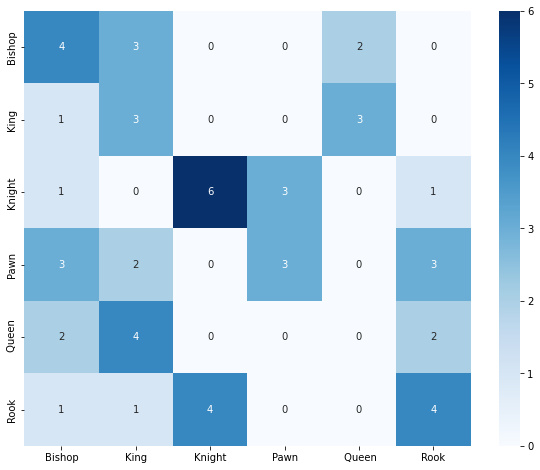

In [74]:
plt.figure(figsize =(10, 8))
class_names = ['Bishop', 'King', 'Knight', 'Pawn', ' Queen', 'Rook']
conf = tf.math.confusion_matrix(labels=y, predictions=y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)
plt.show()

---
### [3] 예측

In [84]:
import urllib.request
from io import BytesIO

from PIL import Image

In [89]:
# 새로운 사진 예측 함수
def pred_print(model, url):
    pre_val= ['Bishop', 'King', 'Knight', 'Pawn', ' Queen', 'Rook']

    # 이미지 불러오기
    urlopen_img = Image.open(url).resize((64,64))
    test_image_arr=np.array(urlopen_img)/255.0

    # 이미지 그래프로 그리기
    plt.imshow(urlopen_img)
    plt.show()

    # 예측
    result=np.round(model.predict(test_image_arr.reshape(-1,64,64,3)),2)
    print(f"예측값 : {result}")
    print(f"예측값 종류 : {pre_val[result.argmax()]}")

In [79]:
testbishop ='./test/bishop.png'
testking ='./test/king.png'
testknight ='./test/knight.png'
testpawn ='./test/pawn.png'
testqueen ='./test/queen.png'
testrook ='./test/rook.png'

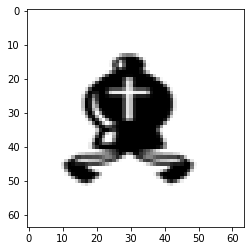

1/1 [==============================] - 0s 159ms/step
예측값 : [[0.06 0.   0.63 0.31 0.   0.  ]]
예측값 종류 : Knight


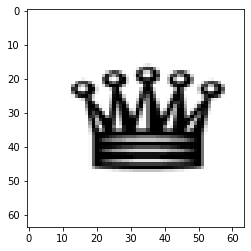

1/1 [==============================] - 0s 149ms/step
예측값 : [[0. 0. 1. 0. 0. 0.]]
예측값 종류 : Knight


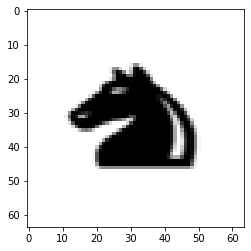

1/1 [==============================] - 0s 107ms/step
예측값 : [[0.05 0.   0.9  0.05 0.   0.  ]]
예측값 종류 : Knight


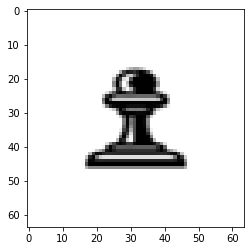

1/1 [==============================] - 0s 96ms/step
예측값 : [[0.35 0.   0.   0.65 0.   0.  ]]
예측값 종류 : Pawn


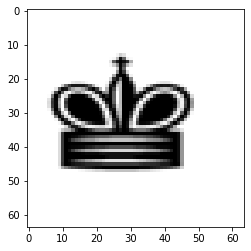

1/1 [==============================] - 0s 98ms/step
예측값 : [[0.   0.01 0.99 0.   0.   0.  ]]
예측값 종류 : Knight


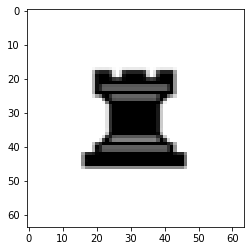

1/1 [==============================] - 0s 100ms/step
예측값 : [[0.01 0.   0.47 0.39 0.   0.13]]
예측값 종류 : Knight


In [90]:
url_list = [testbishop, testking, testknight, testpawn, testqueen, testrook]

for i in url_list:  
    pred_print(model, i)

---